# DACA: LabJack U6

Este es un documento para aprender a manejar la clase DACA de *py_lab* empleando la tarjeta de adquisición de datos U6 de LabJack. También sirve como test exhaustivo de que el software funciona sin errores.

In [1]:
%load_ext autoreload
%autoreload 2

## Creación

En primer lugar hay que importar la clase, crear el objeto y abrir la conexión.

In [2]:
from py_lab.daca import DACA

Al crear el objeto, únicamente hay que indicarle el nombre adecuado (U3, que es el que se da por defecto, o U6/T7, la que corresponda). Después, hay que abrir la conexión con el método *Open*:

* **AIN** (list): Lista de puertos con fotodiodos conectados (sin incluir el de referencia, si existe). Tanto para la Labjack U3 como para la T7 el puerto será el 2.  Por defecto: None
* **AIN_ref** (int o None): Puerto donde está conectado el fotodiodo de referencia. Si trabajamos con la Labjack U3, el puerto será el '1', mientras que para la Labjack T7 será el '0'. Si es None, no habrá fotodiodo de referencia. Por defecto: None.

In [3]:
daca = DACA(name="U6")

In [4]:
daca.Open(AIN=[1], AIN_ref=None)

Una vez creado el objeto, tiene las siguientes propiedades:

* **name** (str): Nombre de la tarjeta (U3, U6 o T7).
* **AIN** (list): Lista de puertos para medir.
* **AIN_ref** (int): Puerto de fotodiodo de referencia.
* **n_AIN** (int): Numero de fotodiodos conectados.
* **background** (list): Lista con la medida de fondos.
* **background_ref** (float): Fondo del diodo de referencia.
* **_object** (object): Objeto de la clase de los drivers de la camara.

## Medida

La utilidad principal de la tarjeta de adquisición de datos. 

Paa medir, se emplea el método *Get_Signal*:

* **is_background** (bool): Si es True, se tomará un nuevo fondo. Por defecto: False.
* **rest_background** (bool): Si es True y hay un fondo guardado, se restará a las medidas tomadas. Por defecto: True.
* **use_ref** (bool): Si es True y hay un fotodiodo de referencia, los valores de salida se dividirán entre el valor del fotodiodo de referencia. Por defecto: True.
* **return_ref** (bool): Si es True, se devuelve el valor medido por el fotodiodo de referencia. Por defecto: True.
* **verbose** (bool): Si es True, imprime en la pantalla la medida realizada. Por defecto: False.

Este método devuelve un array de numpy con las medidas. En caso que haya un fotodiodo de referencia, la señal obtenida por todos los demás se divide entre la señal del fotodiodo de referencia.

In [20]:
# Medida del fondo (laser apagado)
fondo, fondo_ref = daca.Get_Signal(is_background=True, return_ref=True, verbose=True)

Reference:  None
Signal:  [8.560383]


In [39]:
# Medida (laser encendido)
senal, senal_ref = daca.Get_Signal(is_background=False, return_ref=True, verbose=True, rest_background=True, use_ref=True)

Reference:  None
Signal:  [5.e-05]


Se puede obtener el fondo con el método *Get_Background* y eliminarlo con *Clear_Background*.

**NOTA:** Si se cambia la ganancia de los fotodiodos, el fondo actual deja de ser válido.

In [7]:
fondo, fondo_ref = daca.Get_Background(return_ref=True) 
daca.Clear_Background()

# Factor de pérdida

Por algún motivo que desconozco, la U6 tiene un factor de conversion de ~0.8 del que desconozco el motivo. Voy a tomar varios valores para obtener el factor correcto y corregirlo artificialmente.

In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
V_real = np.array([5.99, 5.49, 4.99, 4.49, 3.99, 3.49, 2.99, 2.5, 2, 1.5, 1, 0.5, 0])
V_u6 = np.array([4.875, 4.469, 4.063, 3.657, 3.25, 2.844, 2.438, 2.031, 1.625, 1.219, 0.812, 0.406, 5e-5])
coef = np.polyfit(V_real, V_u6, deg=1)
x = np.array([0, 6])
y = x * coef[0] + coef[1]

[ 0.8144681  -0.00139947]


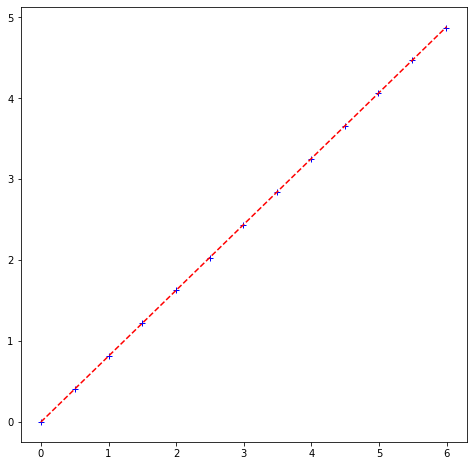

In [48]:
plt.figure(figsize=(8,8))
plt.plot(V_real, V_u6, 'b+')
plt.plot(x, y, 'r--')
print(coef)